In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv(r'../data/Metadata_Country_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_80923.csv')
print(df.head())
print(df.info())

  Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2                  Afghanistan         NaN  
3   Africa Western and Central         NaN  
4                       Angola         Na

In [24]:
# pivot table: Region x Income Group
pivot = df.pivot_table(index='Region', columns='IncomeGroup', aggfunc='size', fill_value=0)
print(pivot)

IncomeGroup                 High income  Low income  Lower middle income  \
Region                                                                     
East Asia & Pacific                  15           1                   12   
Europe & Central Asia                40           0                    3   
Latin America & Caribbean            18           0                    4   
Middle East & North Africa            8           2                    7   
North America                         3           0                    0   
South Asia                            0           1                    6   
Sub-Saharan Africa                    1          22                   19   

IncomeGroup                 Upper middle income  
Region                                           
East Asia & Pacific                           9  
Europe & Central Asia                        15  
Latin America & Caribbean                    19  
Middle East & North Africa                    4  
North America  

In [26]:
income_counts = df['IncomeGroup'].value_counts(normalize=True) * 100
print(income_counts)

IncomeGroup
High income            39.351852
Upper middle income    25.000000
Lower middle income    23.611111
Low income             12.037037
Name: proportion, dtype: float64


In [28]:
missing = df.isnull().sum()
print(missing)

Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    138
TableName         0
Unnamed: 5      265
dtype: int64


In [34]:
special_notes_df = df[df['SpecialNotes'].notnull()]
print(special_notes_df[['Country Code', 'TableName', 'SpecialNotes']])


    Country Code                    TableName  \
1            AFE  Africa Eastern and Southern   
2            AFG                  Afghanistan   
3            AFW   Africa Western and Central   
4            AGO                       Angola   
7            ARB                   Arab World   
..           ...                          ...   
259          WSM                        Samoa   
261          YEM                  Yemen, Rep.   
262          ZAF                 South Africa   
263          ZMB                       Zambia   
264          ZWE                     Zimbabwe   

                                          SpecialNotes  
1    26 countries, stretching from the Red Sea in t...  
2    The reporting period for national accounts dat...  
3    22 countries, stretching from the westernmost ...  
4    The World Bank systematically assesses the app...  
7    Arab World aggregate. Arab World is composed o...  
..                                                 ...  
259  The rep

In [36]:
print(df.sort_values(['IncomeGroup', 'Region']))

    Country Code               Region  IncomeGroup  \
11           ASM  East Asia & Pacific  High income   
13           AUS  East Asia & Pacific  High income   
31           BRN  East Asia & Pacific  High income   
93           GUM  East Asia & Pacific  High income   
96           HKG  East Asia & Pacific  High income   
..           ...                  ...          ...   
237          TMN                  NaN          NaN   
239          TSA                  NaN          NaN   
240          TSS                  NaN          NaN   
248          UMC                  NaN          NaN   
258          WLD                  NaN          NaN   

                                          SpecialNotes  \
11                                                 NaN   
13                                                 NaN   
31                                                 NaN   
93                                                 NaN   
96   On 1 July 1997 China resumed its exercise of s...   
.. 

In [40]:
note_count = df['SpecialNotes'].notnull().sum()
print(f'Number of countries with special notes: {note_count}')

Number of countries with special notes: 127


In [42]:
diversity = df.groupby('Region')['IncomeGroup'].nunique().sort_values(ascending=False)
print(diversity.head())

Region
East Asia & Pacific           4
Middle East & North Africa    4
Sub-Saharan Africa            4
Europe & Central Asia         3
Latin America & Caribbean     3
Name: IncomeGroup, dtype: int64


In [44]:
low_income_df = df[df['IncomeGroup'] == 'Low income']
print(low_income_df['Region'].value_counts())

Region
Sub-Saharan Africa            22
Middle East & North Africa     2
South Asia                     1
East Asia & Pacific            1
Name: count, dtype: int64


In [46]:
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100
print(pivot_pct.round(2))

IncomeGroup                 High income  Low income  Lower middle income  \
Region                                                                     
East Asia & Pacific               40.54        2.70                32.43   
Europe & Central Asia             68.97        0.00                 5.17   
Latin America & Caribbean         43.90        0.00                 9.76   
Middle East & North Africa        38.10        9.52                33.33   
North America                    100.00        0.00                 0.00   
South Asia                         0.00       12.50                75.00   
Sub-Saharan Africa                 2.08       45.83                39.58   

IncomeGroup                 Upper middle income  
Region                                           
East Asia & Pacific                       24.32  
Europe & Central Asia                     25.86  
Latin America & Caribbean                 46.34  
Middle East & North Africa                19.05  
North America  

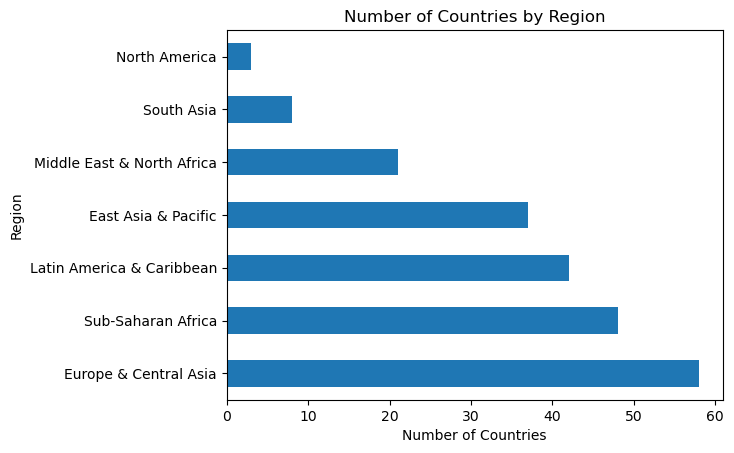

In [52]:
df['Region'].value_counts().plot(kind='barh', title='Number of Countries by Region')
plt.xlabel('Number of Countries')
plt.show()

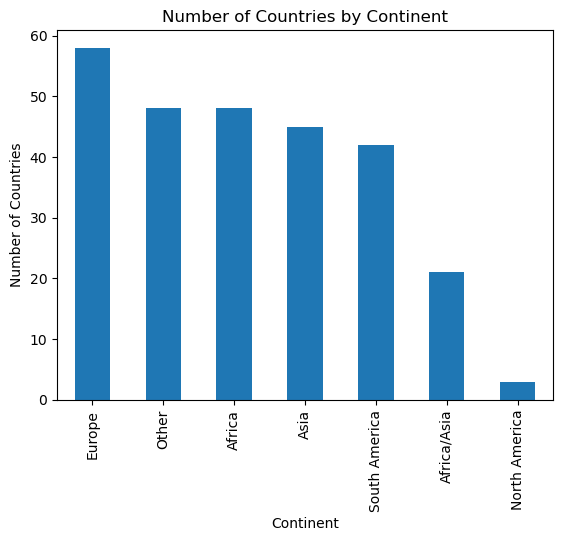

In [62]:
df['Continent'].value_counts().plot(kind='bar', title='Number of Countries by Continent')
plt.ylabel('Number of Countries')
plt.show()

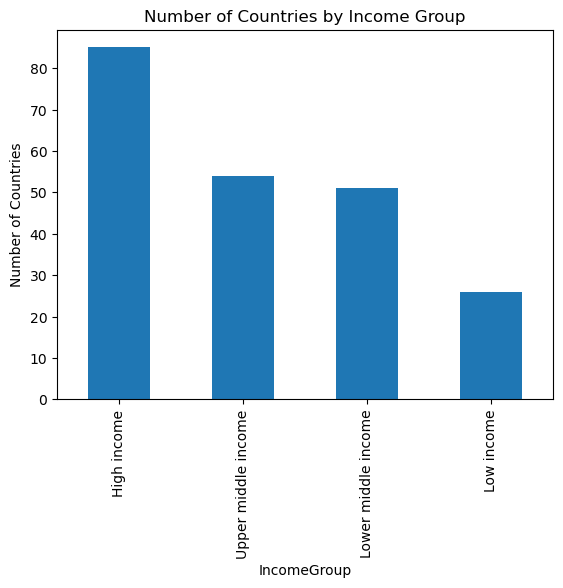

In [56]:
df['IncomeGroup'].value_counts().plot(kind='bar', title='Number of Countries by Income Group')
plt.ylabel('Number of Countries')
plt.show()

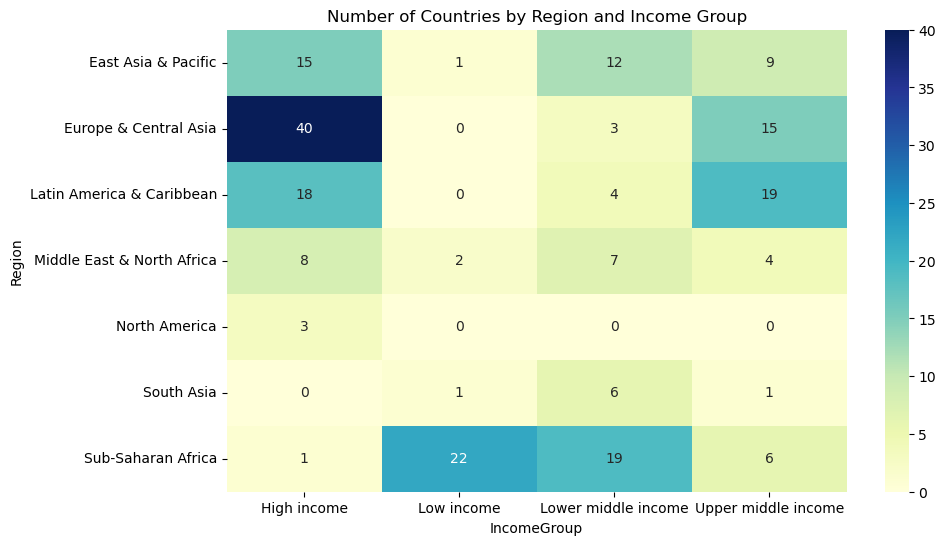

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Countries by Region and Income Group')
plt.show()